In [40]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv(r'C:\Users\Maksim\Desktop\datasets\TelecomChurn.csv')

In [42]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


### Для анализа двух числовых переменных, были взяты столбцы Total day minutes и Total night minutes
### Необходимо определить, зависит ли количество потраченных минут на дневной разговоров на длительность ночного разговора

### Первый шаг - это проверка на наличие пропусков. 
### Пропусков нету ни в одном из выбранных столбцов

In [70]:
df['Total day minutes'].isna().sum()

0

In [71]:
df['Total night minutes'].isna().sum()

0

### Далее необходимо определить распределение переменных
### На 2 графиках ниже видно, что значений переменной Total night minutes имеют небольшое количество выбросов, однако всё распределение нормальное 

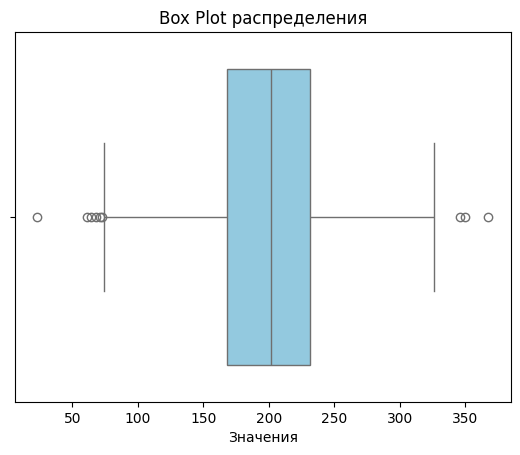

In [72]:
sns.boxplot(data=df, x="Total night minutes", color="skyblue")
plt.title("Box Plot распределения")
plt.xlabel("Значения")
plt.show()

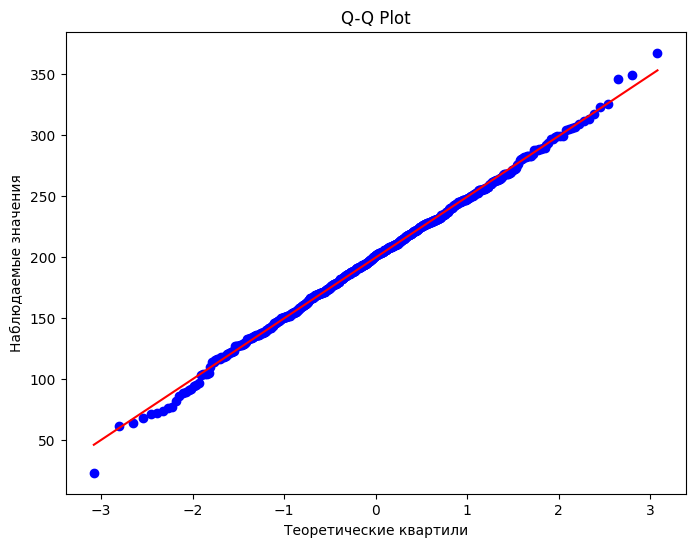

In [73]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Total night minutes'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Теоретические квартили")
plt.ylabel("Наблюдаемые значения")
plt.show()

### На 2 графиках ниже видно, что значений переменной Total day minutes имеют небольшое количество выбросов, однако всё распределение нормальное 

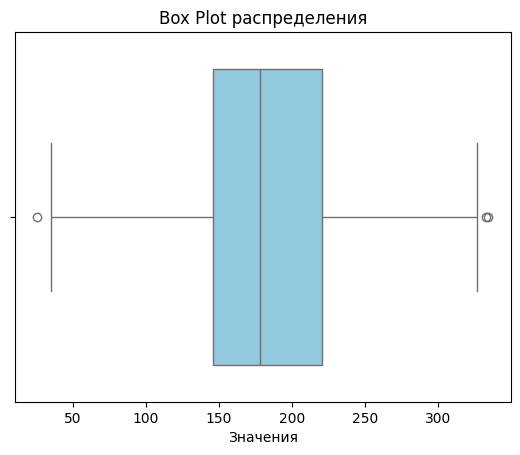

In [47]:
sns.boxplot(data=df, x="Total day minutes", color="skyblue")
plt.title("Box Plot распределения")
plt.xlabel("Значения")
plt.show()

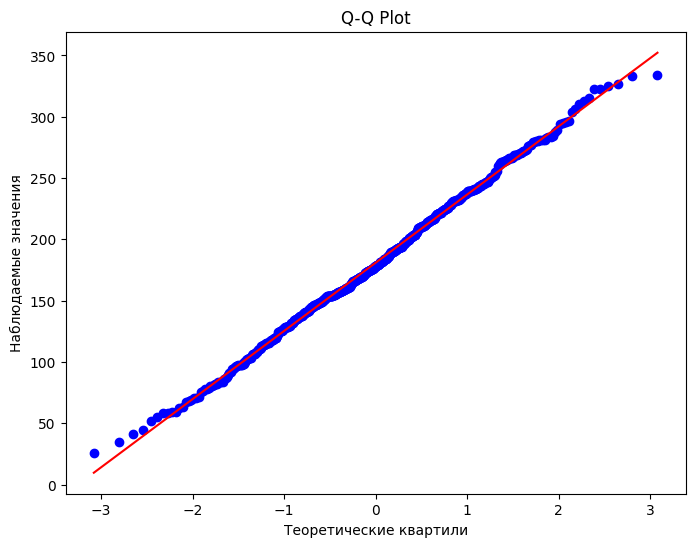

In [48]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Total day minutes'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Теоретические квартили")
plt.ylabel("Наблюдаемые значения")
plt.show()

### Помимо графического метода можно воспользоваться тестом Шапиро-Уилка, для определения нормальное ли распределение или нет.
### Тесты также показали, что распределение в переменных нормальное

In [55]:
stat, p_value = stats.shapiro(df['Total night minutes'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

Тест Шапиро-Уилка p-value: 0.8748206484756822
Распределение похоже на нормальное.


In [54]:
stat, p_value = stats.shapiro(df['Total day minutes'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

Тест Шапиро-Уилка p-value: 0.3966215874894734
Распределение похоже на нормальное.


### Далее необходимо определить 95% доверительный интервал

In [49]:
mean_day_minutes = np.mean(df['Total day minutes'])
mean_night_minutes = np.mean(df['Total night minutes'])

In [50]:
std_error_day = stats.sem(df['Total day minutes'])
std_error_night = stats.sem(df['Total night minutes'])
confidence = 0.95

In [51]:
interval_day = stats.t.interval(confidence, len(df['Total day minutes'])-1, loc=mean_day_minutes, scale=std_error_day)
interval_night = stats.t.interval(confidence, len(df['Total night minutes'])-1, loc=mean_night_minutes, scale=std_error_night)

### 95% доверительный интервал для данных из столбца Total day minutes равен (176.72790070632558, 185.16835116773737)
### Это означает, что с вероятностью 95% среднее значение будет в этом диапозоне

In [52]:
print("Среднее значение:", mean_day_minutes)
print("95% доверительный интервал:", interval_day)

Среднее значение: 180.94812593703148
95% доверительный интервал: (176.72790070632558, 185.16835116773737)


### 95% доверительный интервал для данных из столбца Total night minutes равен (195.90214562914548, 203.46846906350822)
### Это означает, что с вероятностью 95% среднее значение будет в этом диапозоне

In [53]:
print("Среднее значение:", mean_night_minutes)
print("95% доверительный интервал:", interval_night)

Среднее значение: 199.68530734632685
95% доверительный интервал: (195.90214562914548, 203.46846906350822)


### Отрицательное значение t-переменной указывает на то, что средннее здначение первой переменной меньше, чем второй
### Также отвергаем нулевую гипотезу: средние значения выборок различны

In [56]:
t_stat, p_value = stats.ttest_ind(df['Total day minutes'], df['Total night minutes'])

In [57]:
print("t-статистика:", t_stat)
print("p-значение:", p_value)

t-статистика: -6.491377715648717
p-значение: 1.1971411125867586e-10


### Теперь необходимо попределить есть ли корреляция между переменными. 
### По графику рассеяния нельзя сказать что есть какая либо зависимость 

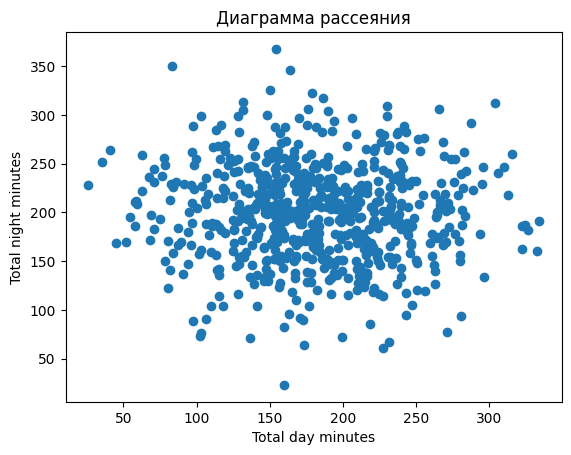

In [74]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])
plt.xlabel('Total day minutes')
plt.ylabel('Total night minutes')
plt.title('Диаграмма рассеяния')
plt.show()

### Тесты Спирмана и Кендалла показали очень маленькую отрицательную корреляцию. Это означает, что увеличение одной переменной влечёт уцменьшение другой.

In [66]:
correlation_spearman = df['Total day minutes'].corr(df['Total night minutes'], method='spearman')
print("Коэффициент корреляции Спирмена:", correlation_spearman)

Коэффициент корреляции Спирмена: -0.040876860567850754


In [67]:
correlation_kendall = df['Total day minutes'].corr(df['Total night minutes'], method='kendall')
print("Коэффициент корреляции Кендалла:", correlation_kendall)

Коэффициент корреляции Кендалла: -0.028794024978374473


In [62]:
import statsmodels.api as sm

### Модель линейной регрессии построенной при помощи метода наименьших квадратов, данная модель практически бесполезна для предсказаний. 
### Низкое значение коэффицента детерминации указывает, на крайне слабую зависимость между двумя переменными. 
### F-статистика и её p-значение указывают, что модель незначима

In [63]:
X = np.array(df['Total day minutes'])
Y = np.array(df['Total night minutes'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6647
Date:                Wed, 20 Nov 2024   Prob (F-statistic):              0.415
Time:                        22:00:34   Log-Likelihood:                -3551.7
No. Observations:                 667   AIC:                             7107.
Df Residuals:                     665   BIC:                             7116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        204.8111      6.576     31.146      0.0